## Chapter 4: Cliques, Clusters, and Components

In this chapter, we start working with progressively larger chunks of the network, analyzing not just the individuals and their connection patterns, but entire subgraphs and clusters. We'll explore what it means to be in a triad and what benefits and stresses can come from being in a structural hole. 

First, we will deconstruct the network by progressively removing parts to find its core(s); then we'll reconstruct the network from its constituent parts--diads, triads, cliques, clans, and clusters. 

### Components and Subgraphs  

To start teasing apart the networks into analyzable parts, let us first make a couple definitions:

- A  *subgraph* is a subset of the nodes of a network, and all of the edges linking these nodes. Any group of nodes can form a subgraph.  
- Component subgraphs (or simply *components*) are portions of the network that are disconnected from each other. Many real networks (especially those collected with random sampling) have multiple components. One could argue that this is a sampling error (which is very possible) -- but at the same time, may just mean that the ties between components are outside of the scope of the sampling and may in fact be irrelevant.  

#### Analyzing Components with Python  

The Egypt uprising retweet network is a good example of a network with many components. The datafile included with this book was collected through a 1% Twitter feed and is largely incomplete. Let us load the data and examine it. NetworkX has a function for isoldating connected components (`connected_component_subgraphs(e)`); the function returns an array of Graph objects corresponding to each of the connected components:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

egypt = "/Users/joshiden/Documents/Classes/CUNY SPS/Spring 2023/DATA620/SNABook/chapter1/egypt_retweets.net"
e = nx.read_pajek(egypt)
len(e)

25178

In [2]:
[len(c) for c in nx.connected_component_subgraphs(e) if len(c) > 10]

[17762, 64, 16, 13, 11, 11, 14, 16]

In [3]:
# connected_component_subgraphs has been deprecated. the below line produces the desired output.
len(list(e.subgraph(c) for c in nx.connected_components(e)))

3122

In [4]:
# with connected_component_subgraphs code from book
len(nx.connected_component_subgraphs(e))

TypeError: object of type 'generator' has no len()

In [5]:
len(list(nx.connected_component_subgraphs(e)))

3122

What this means is that the retweet network contains ~25,000 nodes, but the network is split into over 3,000 component subgraphs. Let us now study how these component sizes are distributed:

(array([3.121e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.77710e+03, 3.55320e+03, 5.32930e+03, 7.10540e+03,
        8.88150e+03, 1.06576e+04, 1.24337e+04, 1.42098e+04, 1.59859e+04,
        1.77620e+04]),
 <BarContainer object of 10 artists>)

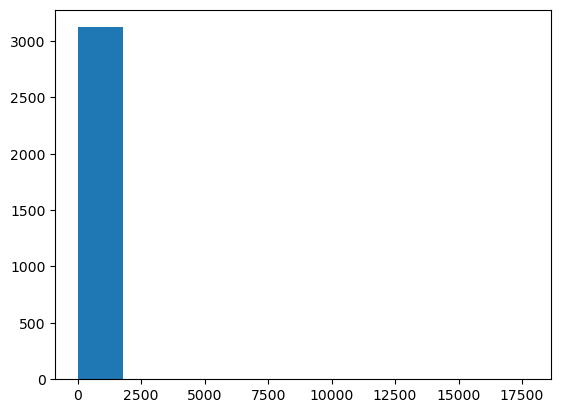

In [6]:
# book code 

x=[len(c) for c in nx.connected_component_subgraphs(e)]
plt.hist(x)

(array([3.121e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.77710e+03, 3.55320e+03, 5.32930e+03, 7.10540e+03,
        8.88150e+03, 1.06576e+04, 1.24337e+04, 1.42098e+04, 1.59859e+04,
        1.77620e+04]),
 <BarContainer object of 10 artists>)

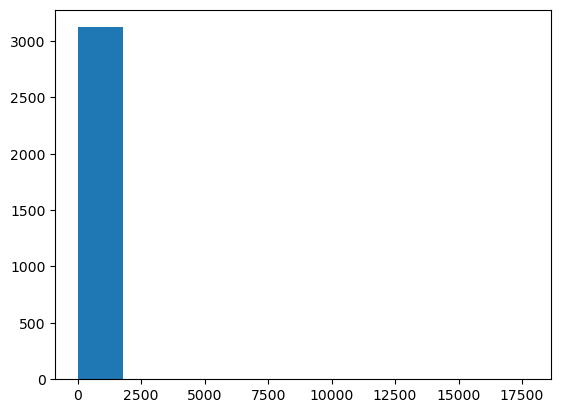

In [7]:
x = list(e.subgraph(c) for c in nx.connected_components(e))
x1 = [len(c) for c in x]
plt.hist(x1)

#### Islands in the Net

One technique for analyzing networks is called "the island method"; it is particularly well-suited to valued networks such as the Egypt Twitter network that we are using as sample data.

The island method works as follows: imagine our network as an island with a complex terrain, where the height of each point on the terrain is defined by the value of a node (eg, degree centrality) or edge (eg, number of retweets_. 

The first thing we need to implement for the *island method* is a function to virtually raise the water lvele. The function below takes a graph, and applies a threshold ("water level"), letting all edges above a certain value through, and removing all others. It returns a copy of the original graph:

In [8]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, edata)
        return g2

Now let's define how the water level should be raised. We will compute evenly spaced thresholds and produce a list of networks at each water level:

In [9]:
def island_method(g, iterations=5):
    weights= [edata['weight'] for f, to, edata in g.edges(data=True)]
    
    mn=int(min(weights))
    mx=int(max(weights))
    
    # compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

Now let's isolate the biggest component of the Egypt Retweet Network, and separate it into subparts using the island method:

In [10]:
cc = list(e.subgraph(c) for c in nx.connected_components(e))[0]
islands = island_method(cc)
for i in islands:
    print(i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1]))))

1 0 0
62 0 0
123 0 0
184 0 0
245 0 0


In [11]:
cc = (e.subgraph(c) for c in nx.connected_components(e))

In [ ]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)[0]

In [ ]:
cc = connected_component_subgraphs(e)

In [12]:
island_method(cc)

AttributeError: 'generator' object has no attribute 'edges'

In [13]:
list(cc)[0]

In [ ]:
S = [e.subgraph(c).copy() for c in nx.connected_components(e)]

In [14]:
largest_cc = max(nx.connected_components(e), key=len)

In [15]:
largest_cc

{'moh_hossameldin',
 'btnafas7oria',
 'GainesvilleLife',
 'AlBedah',
 'BolbolBoi',
 'dandeliontellme',
 'KuanQia',
 'Houeida',
 'sudokum',
 'modemlooper',
 'washingtonweek',
 'joeltena',
 'miguelgarcialop',
 'daryncambridge',
 'lambada_',
 'SamehElsaied',
 'Spanglor_13',
 'parvezsharma',
 'FraCicardi',
 'zizoo',
 'sunnkaa',
 'Mwafyinc',
 'NourShalaby',
 'hajmar',
 'EmptyNestExpat',
 'ObyChuckyChup',
 'dcwomenkicknass',
 'herrkusuma',
 'ahmed_madkour',
 'IceQueer',
 'freetelw',
 'wshaban',
 'gprietogotera',
 'beyerkr',
 'Nayib_Cardenas',
 '00shab00',
 'Zabelbok',
 'heatrazer',
 'sagarTweeting',
 'socioblah',
 'omnologos',
 'Osa_ahlawy',
 'sODAwithanH',
 'NoureenRamzy',
 'ghotothkoch',
 'annavetticad',
 'BIUSTFU1961',
 'Reuters',
 'eliasmaroso',
 'sambarnet',
 'JoseElder',
 'shomali11',
 'fnyff',
 'NicHalley',
 'joellehatem',
 'AmiraaSoliman',
 'missgnoamer',
 'JUANJOSEMOLINA',
 'yuki_issei',
 'defusertt',
 'aaalshehry',
 'amr_shora',
 'Romelia_Ronda_F',
 'Ali_M_Emam',
 'BikyaMasr',
 'ja

In [ ]:
e.edges(data=True)

In [16]:
# find cliques

print(list(nx.find_cliques(e)))

[['carmenkarmelia', 'claraavilac'], ['GainesvilleLife', 'JShahryar'], ['SedonaLace', 'themakeupgirl09'], ['SedonaLace', 'TheGoddenMe'], ['SedonaLace', 'UneLuneBleue'], ['BolbolBoi', 'MinaNaguib90'], ['Houeida', 'SheikhAchmed'], ['Houeida', 'neokato'], ['Houeida', 'FalSoKiDo'], ['Houeida', 'MarieNeigeG'], ['Houeida', 'NadiaE'], ['joeltena', 'StateDept'], ['lambada_', 'Abol3araby'], ['lambada_', 'cardspunk'], ['lambada_', 'mtwfeeq'], ['lambada_', 'phijazin'], ['lambada_', '2insana'], ['CherylKerl', 'takeithandy'], ['SamehElsaied', 'linuxawy'], ['Spanglor_13', 'bbclysedoucet'], ['Spanglor_13', 'acarvin'], ['zizoo', 'Arabista'], ['donnabrazile', 'HAlexander2'], ['sunnkaa', 'soconfhaola'], ['sunnkaa', 'iLDeclectic'], ['sunnkaa', 'gamenis'], ['sunnkaa', 'katamenoneko'], ['sunnkaa', 'dtek84'], ['sunnkaa', 'lemlemz'], ['sunnkaa', 'yellowtbirdconv'], ['sunnkaa', 'PenguinSix'], ['DrewWalker7', 'TexClassicalLib'], ['casparterhorst', 'jipvankuijk'], ['NourShalaby', 'youm7'], ['1BaDDAzzBITCH', 'Tin

In [ ]:
list(e.edges)[:5]

The book provides python examples using code that is deprecated, so I will try to move forward with notes outlining the concepts and incorporate the concepts into this week's assignment

**Island Method** splitting the giant component into smaller components, and areas with the strongest amount of **subcores** become their own components that can be analyzed separately. 

**Steps**

1. Define a function to apply a threshold that lets edges above a certain value through, and removes all others.
2. Next, define a function that computes evenly spaced thresholds and produces a list of networks at each level. 
3. Isolate the biggest component and separate into subparts. 

#### Subgraphs -- Ego Networks

**Ego networks** are subnetworks that are centered on a certain node. On Facebook and LinkedIn, these are simply described as "your network" -- but you can only access your own ego networks, and can't do a broader survey. 

We derive ego networks by running a breadth-first search and limiting the depth (network radius) to a small value, usually not more than 3. While in traditional BFS we build a tree of links we followed to get to a node, to produce an ego network we capture *all* links between node's neighbors. 

#### Extracting and Visualizing Ego Networks with Python

A couple simple metrics stand out. Knowing the size of an ego network is important to understand the reach of the information that a person can transmit (or conversely, have access to).

The other metric is called *clustering coefficient* -- essentially, it measures the proportion of you r friends that are also friends with each other. 

In ego networks, the interpretation is simple -- dense ego networks with a lot of mutual trust have a high clustering coefficient. Star networks with a single broadcast node and passive listeners have a low clustering coefficient. 

### Triads  

**Triads** are three nodes interlinked in some way.

In [1]:
import csv 
import networkx as nx

# open the txt file 
in_file = csv.reader(open('/Users/joshiden/Documents/Classes/CUNY SPS/Spring 2023/DATA620/SNABook/chapter4/9_11_edgelist.txt','r'))

g = nx.Graph()

# read in the edge file, nodes and edges
for line in in_file:
    g.add_edge(line[0],line[1],weight=line[2],conf=line[3])

In [2]:
g.edges(data=True)[0:5]

[('Hani Hanjour', 'Majed Moqed', {'weight': '1', 'conf': '2'}),
 ('Hani Hanjour', 'Nawaf Alhazmi', {'weight': '1', 'conf': '2'}),
 ('Hani Hanjour', 'Khalid Al-Mihdhar', {'weight': '1', 'conf': '2'}),
 ('Hani Hanjour', 'Lotfi Raissi', {'weight': '5', 'conf': '1'}),
 ('Hani Hanjour', 'Bandar Alhazmi', {'weight': '1', 'conf': '2'})]

In [3]:
g.nodes(data=True)[0:5]

[('Hani Hanjour', {}),
 ('Majed Moqed', {}),
 ('Nawaf Alhazmi', {}),
 ('Khalid Al-Mihdhar', {}),
 ('Lotfi Raissi', {})]

In [4]:
# read in the attributes file 

# first let's make sure that all nodes in the graph have the 'flight' attribute
for n in g.nodes_iter():
    g.node[n]['flight']='None'

g.nodes(data=True)[0:5]

[('Hani Hanjour', {'flight': 'None'}),
 ('Majed Moqed', {'flight': 'None'}),
 ('Nawaf Alhazmi', {'flight': 'None'}),
 ('Khalid Al-Mihdhar', {'flight': 'None'}),
 ('Lotfi Raissi', {'flight': 'None'})]

In [5]:
attrb = csv.reader(open('/Users/joshiden/Documents/Classes/CUNY SPS/Spring 2023/DATA620/SNABook/chapter4/9_11_attrib.txt', 'r'))

for line in attrb:
    g.node[line[0]]['flight'] = line[1]
    
g.nodes(data=True)[0:5]

[('Hani Hanjour', {'flight': '77_Pentagon'}),
 ('Majed Moqed', {'flight': '77_Pentagon'}),
 ('Nawaf Alhazmi', {'flight': '77_Pentagon'}),
 ('Khalid Al-Mihdhar', {'flight': '77_Pentagon'}),
 ('Lotfi Raissi', {'flight': 'None'})]

If we plotted the network right now using `nx.draw()` we'd find that the network consists of several disconnected components. This is due to the data being largely gragmentary and incomplete; we should concern ourselves with the largest component of the network only:

In [8]:
# connected_component_subgraphs() returns a list of components, sorted largest to smallest
components = nx.connected_component_subgraphs(g)

# pick the first and largest component
cc = components[0]

We use a custom plotting function in `multimode.py` to plot the picture. The function reads node attributes and assigns colors to them based on attribute values, creating a custom color-map on the fly:

In [9]:
import matplotlib.pyplot as plt
from collections import defaultdict

In [10]:
def plot_multimode(m, layout=nx.spring_layout, type_string='type', filename_prefix='', output_type='pdf'):
    ## create a default color order and an empty color-map
    colors = ['r','g','b','c','m','y','k']
    colormap = {}
    d = nx.degree(m) # we use degree for sizing nodes 
    pos = layout(m)
    
    # now we need to find groups of nodes that need to be colored differently 
    nodesets = defaultdict(list)
    for n in m.nodes():
        t = m.node[n][type_string]
        nodesets[t].append(n)
        
    # draw each group of nodes separately, using its own color settings
    print("drawing nodes...")
    i=0
    for key in nodesets.keys():
        ns=[d[n]*100 for n in nodesets[key]]
        nx.draw_networkx_nodes(m, pos, nodelist=nodesets[key], node_size=ns,
                              node_color=colors[i], alpha=0.6)
        colormap[key] = colors[i]
        i += 1
        if i == len(colors):
            i = 0 ## wrap around the color map if we run out of colors
            
    print(colormap)
    
    ## Draw edges using a default drawing mechanism
    print("drawing edges...")
    nx.draw_networkx_edges(m, pos, width=0.5, alpha=0.5)
    nx.draw_networkx_labels(m, pos, font_size=8)
    plt.axis('off')
    if filename_prefix is not '':
        plt.savefig(filename_prefix+'.'+output_type)

Finally, we plot the networks:

drawing nodes...
{'77_Pentagon': 'r', 'None': 'g', '11_WTC North': 'b', '175_WTC South': 'c', '93_Penn': 'm'}
drawing edges...


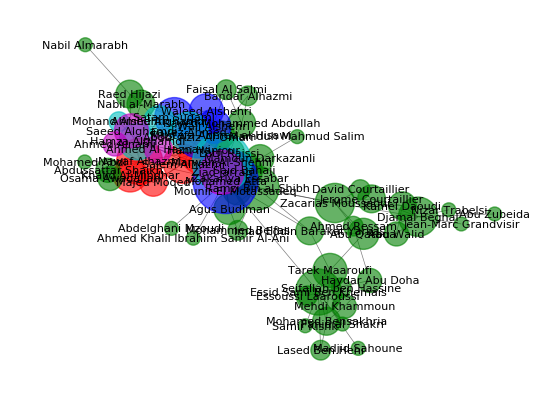

In [13]:
# type-string tells the function what attribute to differentiate on
plot_multimode(cc, type_string='flight');

### Analyzing Triads in Real Networks 

The process of triadic analysis in a real network is called the *triad census* -- in this process, for every node we count occurrences of the 16 types of triads to determine the node's role in the network structure. For example, a node with many occurrences of triads 4, 7, and 11 is a *source* of information or possibly a group leader. 

To run the triad census, we will need an algorithm
